In [4]:
#K- Means Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [11]:
x=df.iloc[:,[3,4]]

In [19]:
from sklearn.cluster import  KMeans


In [21]:
km=KMeans(n_clusters=34)
labels=km.fit_predict(x)
km.inertia_

3749.693975468976

In [23]:
sse=[]
for k in range(1,16):
    km=KMeans(n_clusters=k,random_state=0)
    km.fit_predict(x)
    sse.append(km.inertia_)



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413,
 17702.59593229628,
 15810.838613705504,
 14763.33040255821,
 13165.329070181635,
 12064.939000692288]

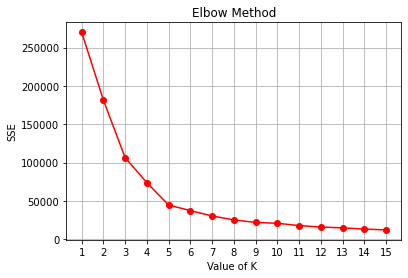

In [26]:
plt.title('Elbow Method')
plt.xlabel('Value of K ')
plt.ylabel('SSE')
plt.grid()
plt.xticks (range(1,16))
plt.plot(range(1,16),sse,color='r',marker='o')

In [27]:
from sklearn.metrics import silhouette_score

In [29]:
silh=[]
for k in range(2,16):
    km=KMeans(n_clusters=k,random_state=0)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)


<BarContainer object of 14 artists>

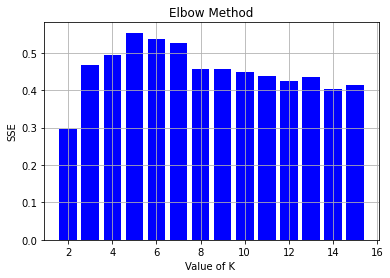

In [33]:
plt.title('Elbow Method')
plt.xlabel('Value of K ')
plt.ylabel('SSE')
plt.grid()
plt.bar(range(2,16),silh,color='b')

In [34]:
km=KMeans(n_clusters=5,random_state=0)
labels=km.fit_predict(x)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [35]:
set(labels)

{0, 1, 2, 3, 4}

In [37]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [38]:
centroid=km.cluster_centers_

In [40]:
km.inertia_

44448.45544793369

In [43]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


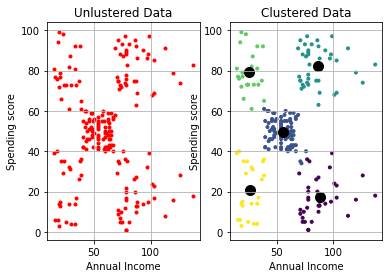

In [53]:
plt.subplot(1,2,1)
plt.title('Unlustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],marker='.',c='r')



plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],marker='.',c=labels)

plt.scatter(centroid[:,0],centroid[:,1],color='k',s=100)

In [54]:
pd.Series(labels).value_counts()

1    81
2    39
0    35
4    23
3    22
dtype: int64

In [76]:
three=df[labels==3]

In [77]:
len(three)

22

In [55]:
new1=[[34,78]]
new2=[[23,45]]
new3=[[71,94]]
new4=[[51,49]]


In [56]:
km.predict(new1)

array([3])

In [57]:
km.predict(new2)

array([4])

In [58]:
km.predict(new3)

array([2])

In [59]:
km.predict(new4)

array([1])

In [62]:
#Extract the Data
one=df[labels==1]

In [63]:
one.to_csv('one.csv',index=False)

In [64]:
df[labels==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [67]:
#dendogram Visulisation
import numpy as np
x=np.array([[5,3],[10,15],[15,12],[24,10],[30,30],
           [85,70],[71,80],[60,78],[70,55],[80,91]])
x

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

In [71]:
from scipy.cluster.hierarchy import dendrogram,linkage
link_crit=linkage(x,'centroid')


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [14.375, 14.375, 64.375, 64.375]],
 'dcoord': [[0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [0.0, 18.82153022471871, 18.82153022471871, 11.180339887498949],
  [0.0, 19.598752794785465, 19.598752794785465, 18.82153022471871],
  [0.0, 25.0711487570873, 25.0711487570873, 19.598752794785465],
  [0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [0.0, 12.020815280171307, 12.020815280171307, 5.830951894845301],
  [0.0, 14.681810363696828, 14.681810363696828, 12.020815280171307],
  [0.0, 25.927784324928346, 25.927784324928346, 14.681810363696828],
  [25.0711487570873,
   82.93129686674385,
   82.93129686674385,
   25.927784324928346]],
 'ivl': [9, 6, 10, 7, 8, 5, 1, 4, 2, 3],
 'leaves': [8, 5, 9, 6, 7, 4, 0, 3, 1, 2],
 'color_list': ['C1', 'C1', 'C1

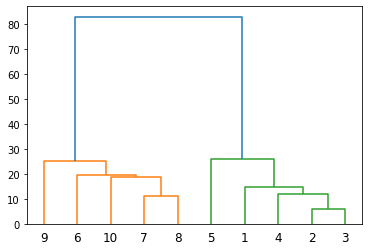

In [74]:
dendrogram(link_crit,labels=range(1,11),
           show_leaf_counts=False)